**Assignment: Compresive Strength Concrete Problem**

**Abstract:**

Concrete is the most important material in civil engineering. The concrete compressive strength (concrete strength to bear the load) is a highly nonlinear function of age and ingredients.

**WORKFLOW :**
Load Data

Check Missing Values ( If Exist ; Fill each record with mean of its feature )

Standardized the Input Variables. Hint: Centeralized the data
Split into 50% Training(Samples,Labels) , 30% Test(Samples,Labels) and 20% Validation Data(Samples,Labels).

Model : input Layer (No. of features ), 3 hidden layers including 10,8,6 unit & Output Layer with activation function relu/tanh (check by experiment).

Compilation Step (Note : Its a Regression problem , select loss , metrics according to it)

Train the Model with Epochs (100) and validate it

If the model gets overfit tune your model by changing the units , No. of layers , activation function , epochs , add dropout layer or add Regularizer according to the need .

Evaluation Step

Prediction

**Load Data:**

[Click Here to Download DataSet](https://github.com/ramsha275/ML_Datasets/blob/main/compresive_strength_concrete.csv)

In [1]:
#import all required libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras import models,layers

In [3]:
#to upload the Datset File that we use in training
from google.colab import files
upload=files.upload()

Saving compresive_strength_concrete.csv to compresive_strength_concrete.csv


In [4]:
df=pd.read_csv('/content/compresive_strength_concrete.csv')#reading the file 
df.head()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   Cement (component 1)(kg in a m^3 mixture)              1030 non-null   float64
 1   Blast Furnace Slag (component 2)(kg in a m^3 mixture)  1030 non-null   float64
 2   Fly Ash (component 3)(kg in a m^3 mixture)             1030 non-null   float64
 3   Water  (component 4)(kg in a m^3 mixture)              1030 non-null   float64
 4   Superplasticizer (component 5)(kg in a m^3 mixture)    1030 non-null   float64
 5   Coarse Aggregate  (component 6)(kg in a m^3 mixture)   1030 non-null   float64
 6   Fine Aggregate (component 7)(kg in a m^3 mixture)      1030 non-null   float64
 7   Age (day)                                              1030 non-null   int64  
 8   Concrete compressive strength(MPa, megapascals)  

In [6]:
df['Age (day)']=df.select_dtypes('int64').astype('float64')#converting age column to float64

In [7]:
test_val=(30/100)*len(df)#get the value that r 30% of Dataset
train_val=(50/100)*len(df)#get the value that r 50% of Dataset
val_val=(20/100)*len(df)#get the value that r 20% of Dataset

test_data=df.loc[len(df)-test_val: ,:'Age (day)']#separating the test data from dataset, pick the data from last of dataset
test_labels=df.loc[len(df)-test_val: ,'Concrete compressive strength(MPa, megapascals) ']#separating the test labels from dataset

remaining_data=df.loc[:len(df)-test_val,:'Age (day)']#to store the remaing datset for further processing
remaining_labels=df.loc[:len(df)-test_val,'Concrete compressive strength(MPa, megapascals) ']


In [8]:
mean=df.mean(axis=0)
std=df.std(axis=0)

remaining_data-=mean
remaining_data/=std

test_data-=mean
test_data/=std

In [9]:
train_data = remaining_data.loc[ :test_val]
train_labels = remaining_labels.loc[ :test_val]

val_data=remaining_data.loc[test_val:]
val_labels=remaining_labels.loc[test_val:]

In [10]:
model=models.Sequential()
model.add(layers.Dense(36,activation='relu',input_shape=(8,)))
model.add(layers.Dense(36,activation='relu'))
model.add(layers.Dense(1))


In [11]:
model.compile(optimizer='rmsprop',loss='mse',metrics=['mae'])

In [12]:
model.fit(train_data,train_labels,epochs=150,batch_size=100,validation_data=(val_data,val_labels))

Epoch 1/150
4/4 [==============================] - 1s 161ms/step - loss: 2189.2393 - mae: 43.2234 - val_loss: 1394.7069 - val_mae: 33.4158
Epoch 2/150
4/4 [==============================] - 0s 18ms/step - loss: 2179.3166 - mae: 43.0780 - val_loss: 1379.5189 - val_mae: 33.1999
Epoch 3/150
4/4 [==============================] - 0s 17ms/step - loss: 2073.6135 - mae: 41.9523 - val_loss: 1366.3468 - val_mae: 33.0098
Epoch 4/150
4/4 [==============================] - 0s 17ms/step - loss: 2022.6482 - mae: 41.3610 - val_loss: 1353.9609 - val_mae: 32.8323
Epoch 5/150
4/4 [==============================] - 0s 17ms/step - loss: 2052.8553 - mae: 41.6150 - val_loss: 1341.7311 - val_mae: 32.6516
Epoch 6/150
4/4 [==============================] - 0s 18ms/step - loss: 2042.6364 - mae: 41.4431 - val_loss: 1328.8654 - val_mae: 32.4640
Epoch 7/150
4/4 [==============================] - 0s 17ms/step - loss: 2009.7843 - mae: 41.2977 - val_loss: 1315.6144 - val_mae: 32.2700
Epoch 8/150
4/4 [================

In [15]:
def build_model():
  model=models.Sequential()
  model.add(layers.Dense(36,activation='relu',input_shape=(8,)))
  model.add(layers.Dense(36,activation='relu'))
  model.add(layers.Dense(1))
  model.compile(optimizer='rmsprop',loss='mse',metrics=['mae'])
  return model

In [20]:
k = 4
num_val_samples = len(remaining_data) // k
num_epochs = 80
all_mae_histories = []
for i in range(k):
 print('processing fold #', i)

 # Prepare the validation data: data from partition # k
 val_data = remaining_data[i * num_val_samples: (i + 1) * num_val_samples]
 val_targets = remaining_labels[i * num_val_samples: (i + 1) * num_val_samples]


 # Prepare the training data: data from all other partitions
 partial_train_data = np.concatenate([remaining_data[:i * num_val_samples],remaining_data[(i + 1) * num_val_samples:]],axis=0)
 partial_train_targets = np.concatenate([remaining_labels[:i * num_val_samples],remaining_labels[(i + 1) * num_val_samples:]],axis=0)
 # Build the Keras model (already compiled)


 model = build_model()
 # Train the model (in silent mode, verbose=0)
 history = model.fit(partial_train_data, partial_train_targets,validation_data=(val_data, val_targets),epochs=num_epochs, batch_size=5)
 mae_history = history.history['val_mae']
 all_mae_histories.append(mae_history)

processing fold # 0
Epoch 1/80
109/109 [==============================] - 1s 3ms/step - loss: 1239.3618 - mae: 31.2900 - val_loss: 1911.0229 - val_mae: 40.6310
Epoch 2/80
109/109 [==============================] - 0s 2ms/step - loss: 612.9535 - mae: 19.9674 - val_loss: 928.6174 - val_mae: 25.8085
Epoch 3/80
109/109 [==============================] - 0s 2ms/step - loss: 267.0385 - mae: 12.6650 - val_loss: 526.4664 - val_mae: 18.2416
Epoch 4/80
109/109 [==============================] - 0s 2ms/step - loss: 200.7095 - mae: 10.9370 - val_loss: 427.7041 - val_mae: 16.8539
Epoch 5/80
109/109 [==============================] - 0s 2ms/step - loss: 164.8756 - mae: 10.1977 - val_loss: 433.7340 - val_mae: 16.8193
Epoch 6/80
109/109 [==============================] - 0s 2ms/step - loss: 144.9435 - mae: 9.5138 - val_loss: 454.9314 - val_mae: 16.7640
Epoch 7/80
109/109 [==============================] - 0s 2ms/step - loss: 150.7544 - mae: 9.6427 - val_loss: 471.2066 - val_mae: 16.7642
Epoch 8/80
109

In [21]:
average_mae_history = [np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]

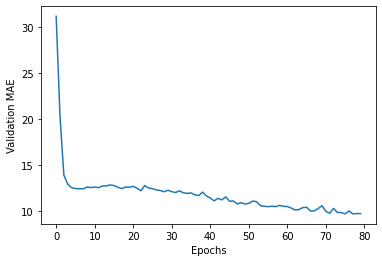

In [22]:
plt.plot(range(len(average_mae_history)), average_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()


In [23]:
test_mse_score, test_mae_score = model.evaluate(test_data, test_labels)

10/10 [==============================] - 0s 2ms/step - loss: 121.2602 - mae: 8.7014


In [14]:
test_mae_score

11.646957397460938